<a href="https://colab.research.google.com/github/ivancao98/Credit-Card-Defaults-EDA/blob/main/Credit_Card_Default_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving default of credit card clients.csv to default of credit card clients.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [4]:
df = pd.read_csv('default of credit card clients.csv')

In [5]:
df.shape

(30001, 25)

The shape of the dataframe is not in the correct shape. First row is a header, and first column is a unique ID tied to each client. Going to remove the first column and set the first row as a header.

In [6]:
new_header = df.iloc[0] # stores first row as header
df = df[1:].copy() # take every row after header
df.columns = new_header # sets column names as new_header var

df.drop('ID', inplace = True, axis = 1)
df.shape

(30000, 24)

In [7]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,24,1,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,26,2,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,34,2,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,37,1,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,57,1,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   AGE                         30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

Going to change data type for columns as objects can not be ran through a correlation matrix later. Will make data transformation easier.

In [9]:
df = df.apply(pd.to_numeric)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   AGE                         30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

**Data Pre Processing**

---


Checking for missing data in the dataframe

In [11]:
df.isnull().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
AGE                           0
MARRIAGE                      0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

No nulls exist, but I noticed that some values do not fit in the data description provided by the original data set.




Education is supposed to have 4 possible values (1: Graduate, 2: University, 3: High School, 4: Other), but in the data set, 6 values exist

In [12]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

I am going to change 0, 5, and 6 to 4 (others).



In [13]:
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)
df.EDUCATION.unique()

array([2, 1, 3, 4])

I am going to do the same for the marriage variable. 0 will be converted to 3 (other).

In [14]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)
df.MARRIAGE.unique()

array([1, 2, 3])

In [15]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Now that some of the values has been altered, I will check if multicollinearity exists among the data variables. Multicollinearity implies that independent variables are correlated with one another resulting in less statistical significance. Variables that are collinear to one another should be removed from the model.

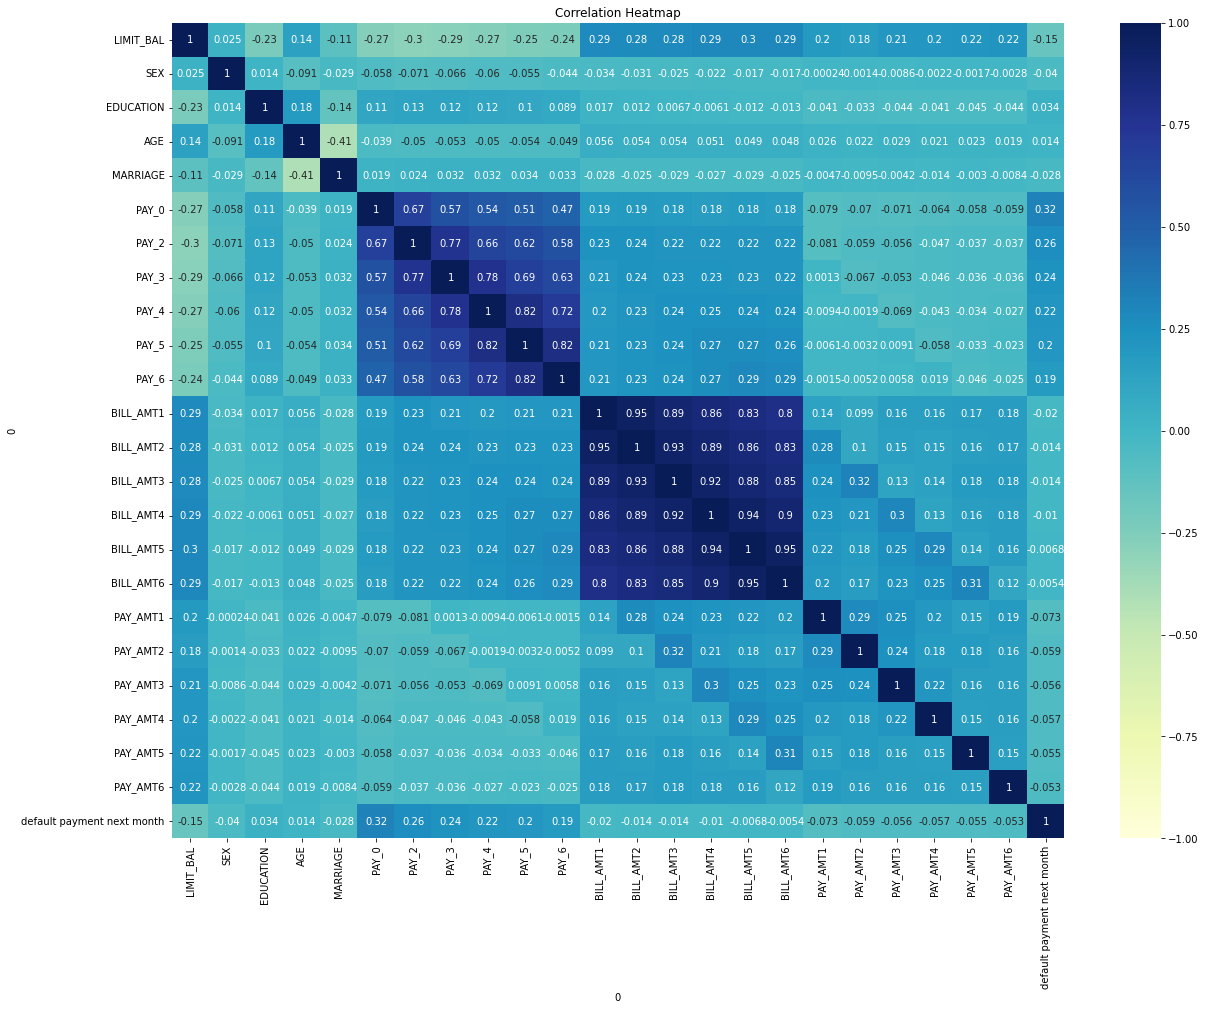

In [16]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

Notice bill amt (1-6) have high correlation with bill amt (1-6), pay (0-6) are also highly correlated with pay (0-6). These two categories are outlined by a darker square in the heatmap above. This makes sense, as a person who pays their credit card statement one month are more likely to pay their next statement. Similarly, a person with a high bill amount one month is likely to have a high bill amount the next month.

When looking at other variables, there does not seem to be multicollinearity that exists and I decided not to remove any variables.

In [17]:
df.rename(columns = {'default payment next month': 'DEFAULT'}, inplace = True)

Exploring the demographics of the credit card holders, I want to see the breakdown of education background, marital status, and age groups.

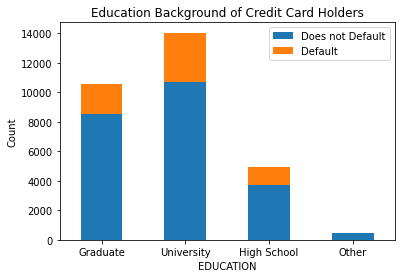

In [18]:
education_plot = df.groupby(['DEFAULT', 'EDUCATION']).size().reset_index().pivot(columns = 'DEFAULT', index = 'EDUCATION', values = 0)
education_plot.plot(kind='bar', stacked=True)
plt.title('Education Background of Credit Card Holders')
plt.ylabel('Count')
ticks = [0, 1, 2, 3]
xtickers = ['Graduate', 'University', 'High School', 'Other']
plt.xticks(ticks = ticks, labels = xtickers, rotation = 0)
plt.legend(labels = ['Does not Default', 'Default'])

From the plot, we can see that the majority of credit holders have graduate school (1) and university (2) background. 

However, we also observe that the number of clients that default on their next payment is not proportional to their educational background. When comparing a graduate background and a high school background, there is only a slight decrease in the number of clients that default on their next payment with a high school background (3) compared to a graduate background (1) whereas the number of total clients with a graduate background (count: 10585) is more than double the amount of clients with a high school background (count: 4917).

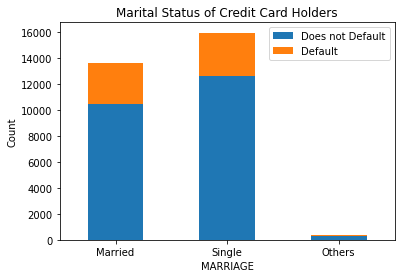

In [19]:
marital_plot = pd.DataFrame(df.groupby(['DEFAULT', 'MARRIAGE']).size().reset_index().pivot(columns = 'DEFAULT', index = 'MARRIAGE', values = 0))
marital_plot.plot(kind='bar', stacked=True, title = 'Marital Status of Credit Card Holders')
plt.ylabel('Count')
ticks = [0, 1, 2]
xtickers = ['Married', 'Single', 'Others']
plt.xticks(ticks = ticks, labels = xtickers, rotation = 0)
plt.legend(labels = ['Does not Default', 'Default'])

In [20]:
marital_plot

DEFAULT,0,1
MARRIAGE,,
1,10453,3206
2,12623,3341
3,288,89


From the plot breakdown, we can see that the number of single clients is higher than the number of married clients. There does not seem to be a strong relationship between marital status and defaulting.

Lastly, I want to see the age breakdown for credit card holders. 

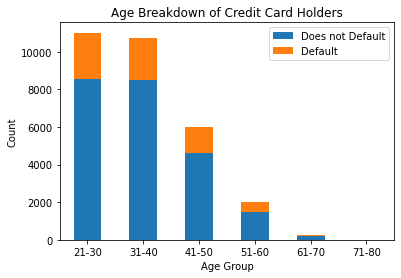

In [21]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

age_plot = df.groupby(['DEFAULT', 'AGE_BIN']).size().reset_index().pivot(columns = 'DEFAULT', index = 'AGE_BIN', values = 0)
age_plot.plot(kind='bar', stacked=True, title = 'Age Breakdown of Credit Card Holders')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.xticks(rotation = 0)
plt.legend(labels = ['Does not Default', 'Default'])


I am creating a function that one hot encodes the categorical variables Education, Marital Status and Sex.

In [22]:
def OneHotEncode(data, col):
  df = data.copy()
  dummies = pd.get_dummies(df[col], drop_first = True, prefix = col)
  df = pd.concat([df, dummies], axis = 1)
  df = df.drop(col, axis = 1)
  return df

def preprocessing(data):
  df = data.copy()
  df = OneHotEncode(df, 'EDUCATION')
  df = OneHotEncode(df, 'MARRIAGE')
  df = OneHotEncode(df, 'SEX')
  Y = df['DEFAULT'].copy()
  X = df.drop(['DEFAULT', 'AGE_BIN'], axis = 1).copy()
  scaler = RobustScaler()
  X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
  return X, Y

In [23]:
X, y = preprocessing(df)

By creating a training and testing set, we can observe the performance of the model by first training it on the train set and testing it's predictions on the testing set.

I will also be using four metrics to measure the model's quality; Accuracy, Precision, Recall, and F1-score. All of these metrics will be stored in the Evalution_metrics dataframe.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
Evaluation_metrics = pd.DataFrame(index = ["Accuracy", "Precision", "Recall", 'F1 Score'])

In [25]:
import xgboost as xgb
train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

In [26]:
param = {
    'max_depth' : 4,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 3}

epochs = 10

In [27]:
model = xgb.train(param, train, epochs)

In [28]:
predictions = model.predict(test)

In [29]:
print(accuracy_score(y_test, predictions))
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(f1_score(y_test, predictions))

0.8292222222222222
0.6839530332681018
0.36539466806063775
0.47632027257240206


In [30]:
models = [SVC(), MLPClassifier(max_iter = 500), DecisionTreeClassifier(), GaussianNB()]

for model in models:
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  Evaluation_metrics.loc['Accuracy', model] = accuracy_score(y_pred = pred, y_true = y_test)
  Evaluation_metrics.loc['Precision', model] = precision_score(y_pred = pred, y_true = y_test)
  Evaluation_metrics.loc['Recall', model] = recall_score(y_pred = pred, y_true = y_test)
  Evaluation_metrics.loc['F1 Score', model] = f1_score(y_pred = pred, y_true = y_test)

In [31]:
Evaluation_metrics

,SVC(),MLPClassifier(max_iter=500),DecisionTreeClassifier(),GaussianNB()
Accuracy,0.823556,0.819000,0.728222,0.517333
Precision,0.686567,0.620954,0.373995,0.279681
Recall,0.312598,0.381077,0.413487,0.806587
F1 Score,0.429598,0.472303,0.392751,0.415343


Creating a plot to display the results of the metrics visually.


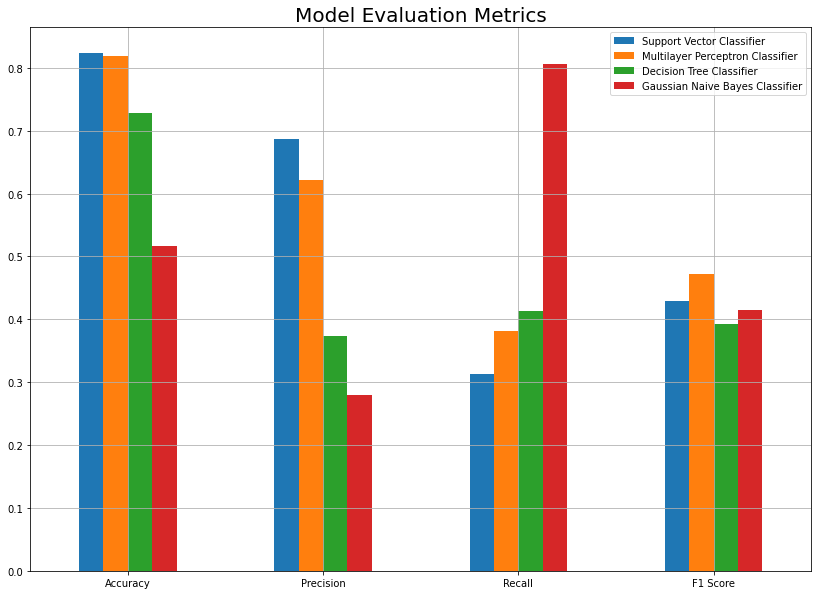

In [32]:
fig, ax = plt.subplots(figsize = (14,10))
Evaluation_metrics.plot(kind = 'bar', ax = ax)
plt.title('Model Evaluation Metrics', fontsize = 20)
plt.xticks(rotation = 0)
plt.legend(labels = ['Support Vector Classifier', 'Multilayer Perceptron Classifier', 'Decision Tree Classifier', 'Gaussian Naive Bayes Classifier'])
ax.grid()

From these bar plots, we can see the results of the evaluation metrics data frame. I have used four units of measurement for the quality of each model; testing each model for accuracy, precision, recall, and f1-score.

**Definition:**

---


Accuracy measures the model's performance of predicting the sum of true positives (payer default, model predicts default) and true negatives (payer does not default, model predicts does not default) divided by the total amount of predictions to be made. 

Precision measures the count of true positives (payer default, model predicts default) divded by the total of positive predictions made (all default predictions). 

Recall measures count of true positives (payer default, model predicts default) out of all actual positive values (all default that occurs). 

F1 score is the weighted average of precision and recall.

**Selecting a Model**

---


In terms of Accuracy and Precision, Support Vector Classification was the best performing model. In terms of Recall, Gaussian Naive Bayes classification was the highest performing model. In terms of recall, all models performed similarly with Multi-layer Perceptron (MLP) classification being the top performing model.

Since we are predicting for credit card defaults, a false negative (when client defaults on next payment, but model predicted that the client will not default) is going to be more consequential compared to a false positive. Out of all the metrics, recall is going to the most important measurement in terms of model's quality. The final model will be the Gaussian Naive Bayes classifier as it has the highest recall out of any model.

**Next Steps**

---


The next steps after picking out the Naive bayes classification algorithm to predict for defaults, I would explore feature importance to see which variables are most important when it comes to determining defaults. By doing so, I can remove insignificant variables from the data set. I can also add a new variable which will take the percentage of pay_amt divded by bill_amt. The lower this percentage is, the more likely the client will default on the next month's payment. This percentage takes into account the percentage of the bill being paid off, if it is high, then the person is more likely to pay off the bill, preventing a default.

**The Significance of Credit Card Default Risk Prediction**

---


Default prediction assists bank in determining credit risk with customers. By doing so, banks can maximize credit amounts while also limiting losses. Risk management plays an important role in all sectors, with banks wanting to minimize risk while maximizing profit, customers with high credit score and low credit risk are desired. To prevent further losses, customers that are deemed high risk should have lower credit limits and higher interests rates when lending money through loans and lines of credit.